In [1]:
library(tidyverse)
library(ggplot2)
#library(plyranges)
library(hrbrthemes)
library(ggpubr)
library(patchwork)
library(extrafont)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registering fonts with R



In [2]:
insculationScore <- function(mat, name) {
    num = dim(mat)[1]
    w = 5
    scores = c()
    for (i in (w+1):(num-w)) {
      score = sum(mat[(i-w):i,i:(i+w)])
        scores = c(scores, score)
    }
    data = tibble(i = seq_along(scores) + w, name=scores)
    return(data)
}

# Focusing on a single region : chr1:8Mb-24Mb

## Observed interactions

In [132]:
matrix_data = read.table("../bos_taurus/observed/contacts_64000.txt", sep = "\t")
mat = as.matrix(matrix_data)
colnames(mat) <- NULL
mat[!is.finite(mat)] <- 0

#logmat=mat
#logmat = log(mat)
logmat[!is.finite(logmat)] <- mean(logmat[is.finite(logmat)])

In [133]:
num = dim(logmat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(logmat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
observed = tibble(pos = seq_along(scores) + w, observed=scores)

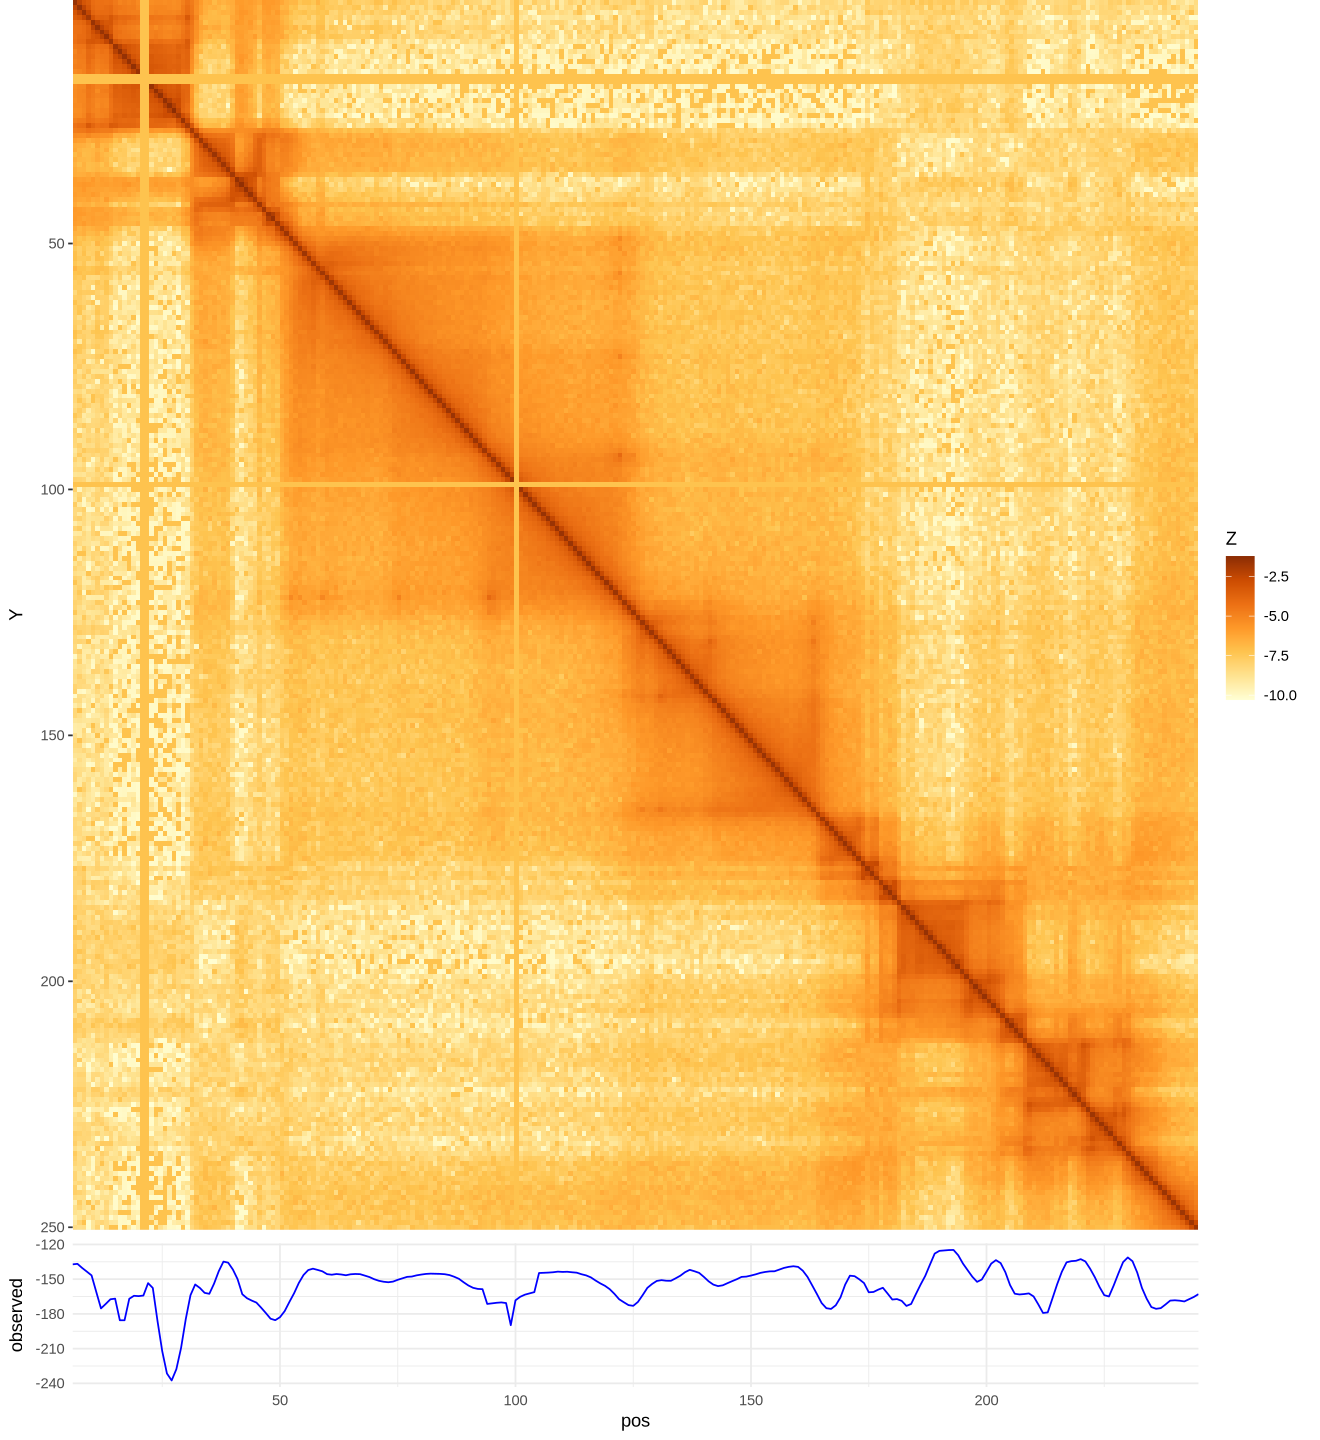

In [134]:
plotmat = logmat
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
p2 = observed %>% ggplot(aes(x=pos, y=observed)) +
         geom_line(color="blue") +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

### Computing predicted contacts

In [135]:
matrix_data = read.table("../bos_taurus/wildtype/orca_predictions_16Mb.txt", sep = "\t")
obsexp = as.matrix(matrix_data)
colnames(obsexp) <- NULL
matrix_data = read.table("../bos_taurus/wildtype/orca_normmats_16Mb.txt", sep = "\t")
expected = as.matrix(matrix_data)
colnames(expected) <- NULL

In [136]:
predicted = obsexp + log(expected)

In [137]:
num = dim(predicted)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(predicted[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
precontacts = tibble(pos = seq_along(scores) + w, predicted=scores)

In [138]:
data <- observed %>%
  left_join(precontacts, by = "pos") 

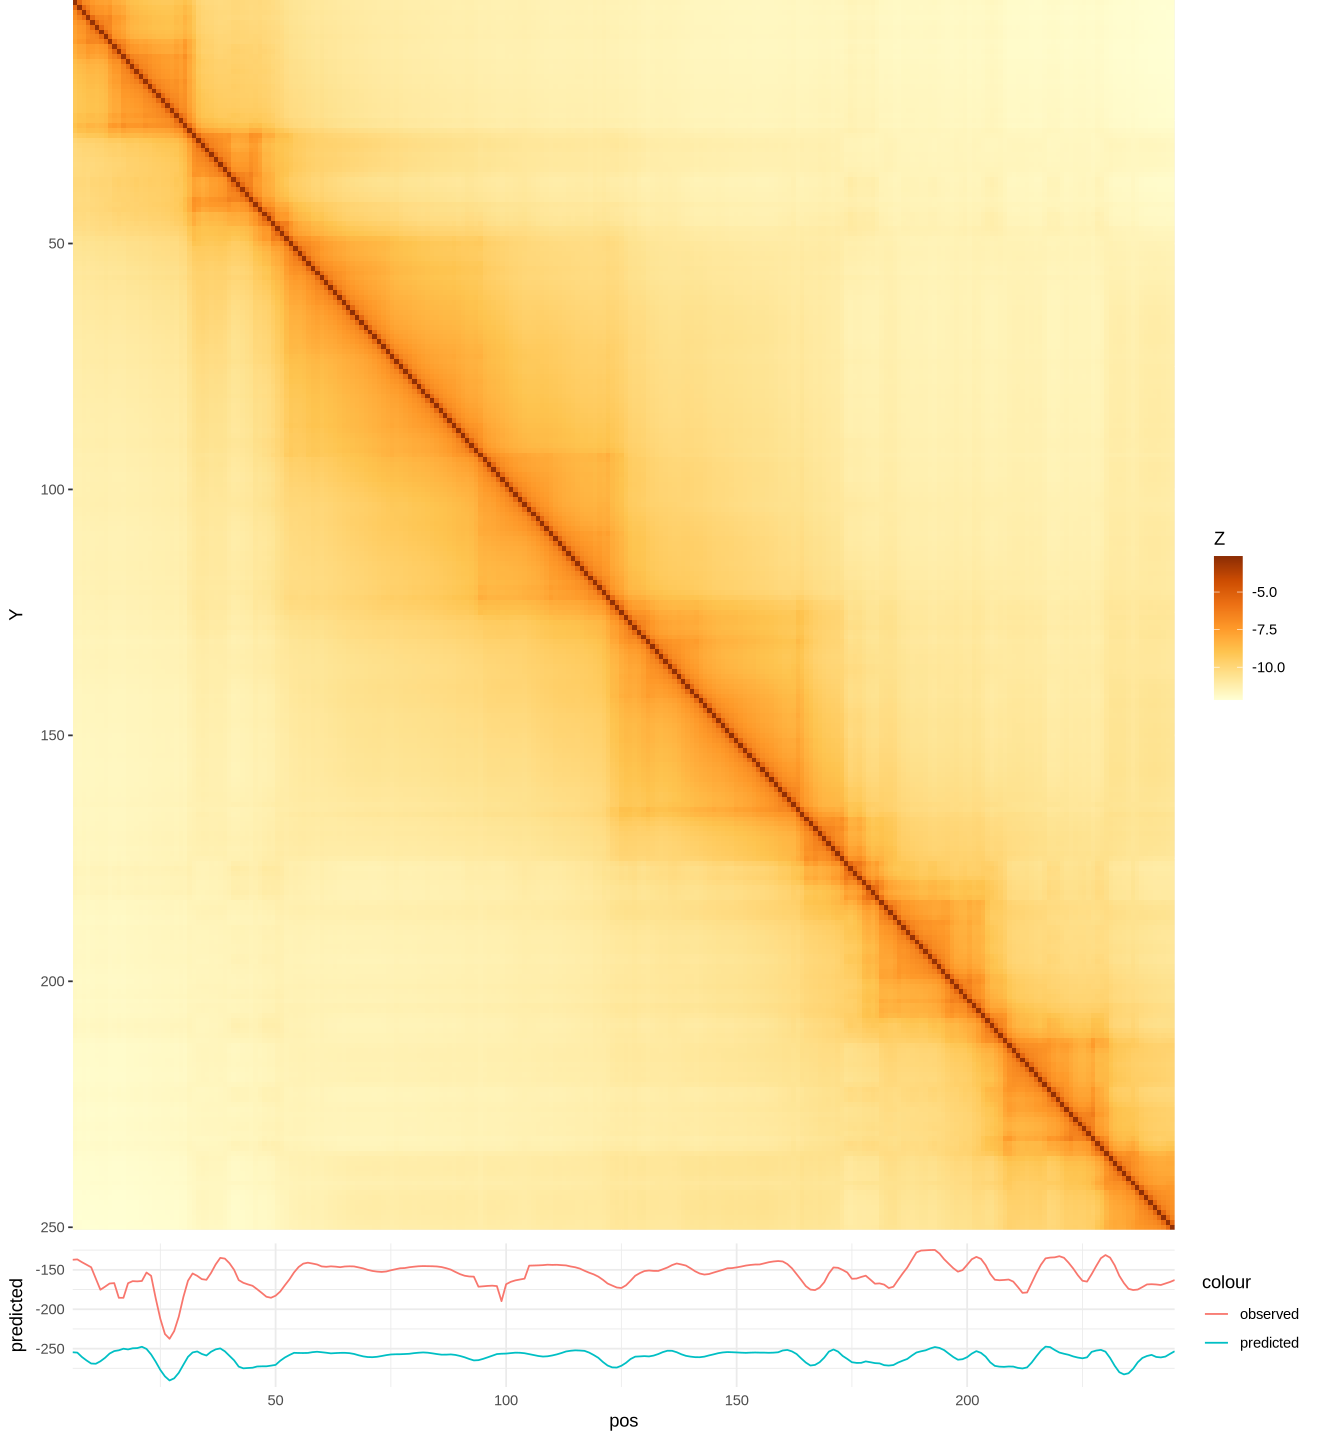

In [139]:
plotmat = predicted
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = data %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = predicted, colour = "predicted")) +
         geom_line(aes(y = observed, colour = "observed")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

## Observed/expected interactions (log)

In [140]:
matrix_data = read.table("../bos_taurus/observed/observed_64000.txt", sep = "\t")
mat = as.matrix(matrix_data)
colnames(mat) <- NULL
mat[!is.finite(mat)] <- 0

In [141]:
num = dim(mat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(mat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
observed = tibble(pos = seq_along(scores) + w, observed=scores)

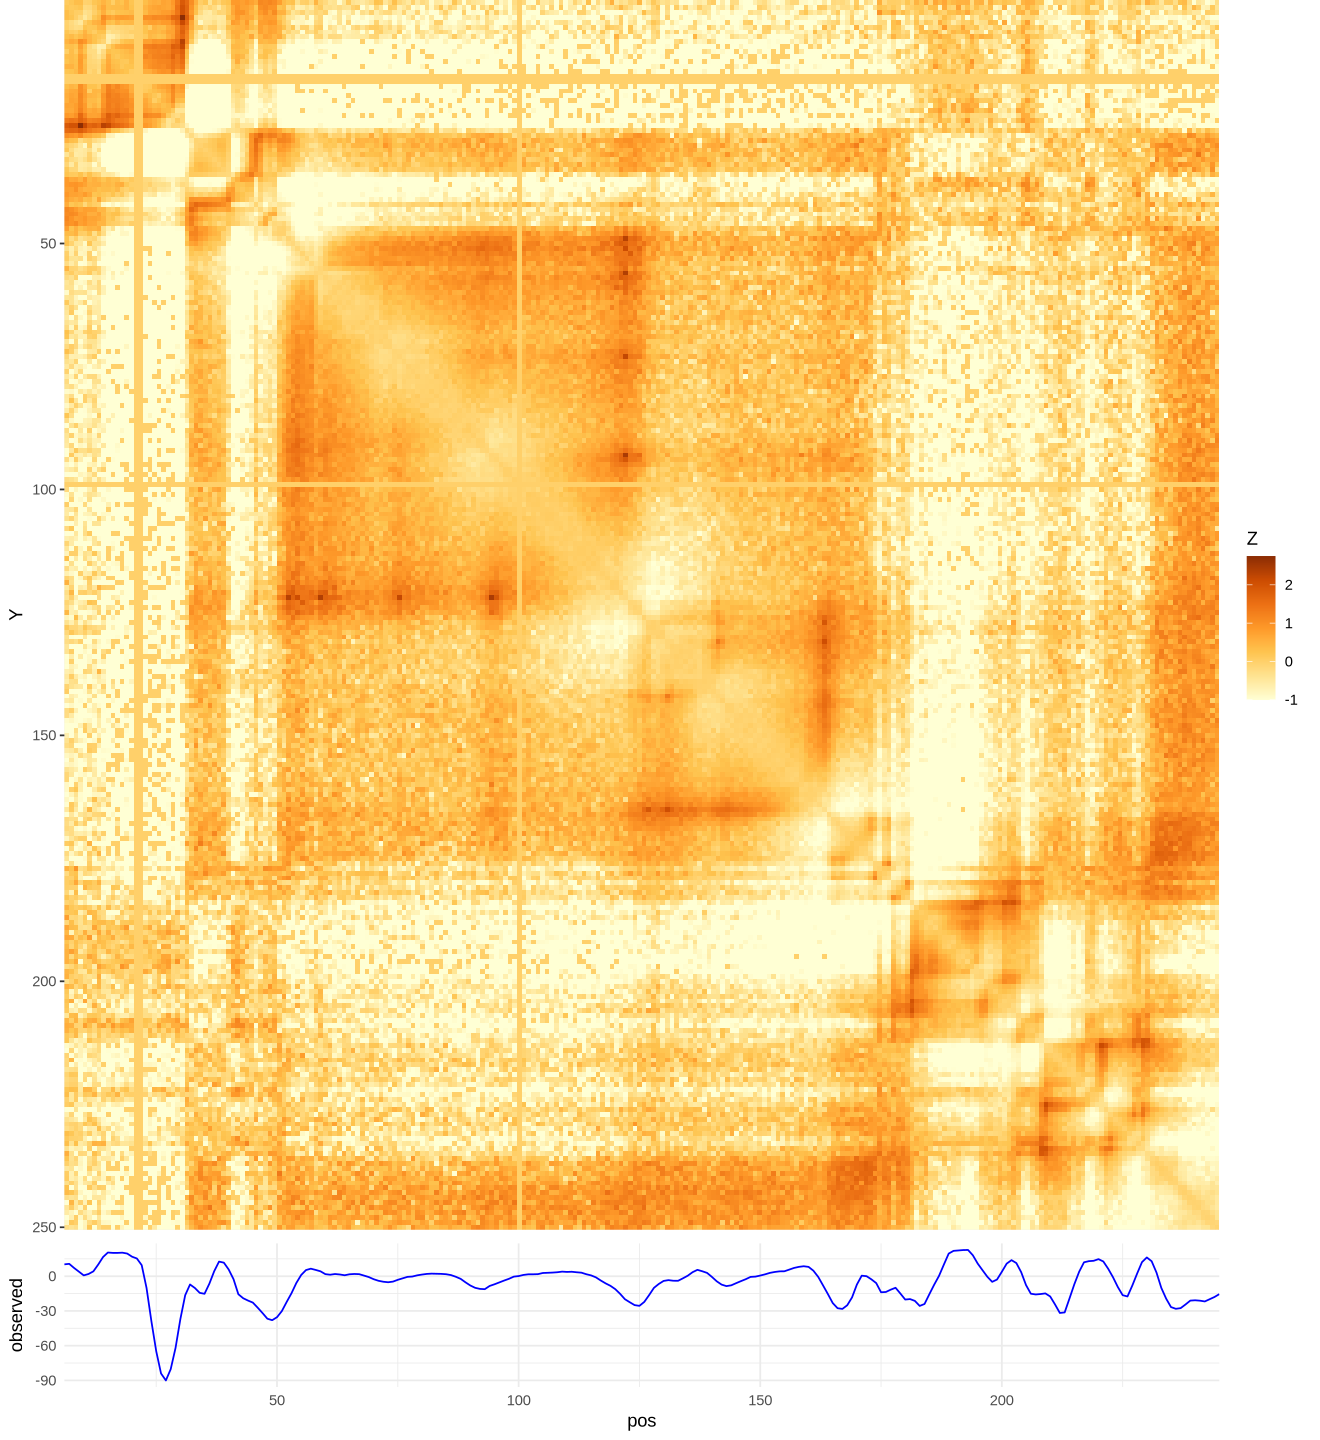

In [142]:
vmin=-1
plotmat = mat
plotmat[plotmat<vmin] = vmin
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = observed %>% ggplot(aes(x=pos, y=observed)) +
         geom_line(color="blue") +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

### Orca predicted observed/expected

In [143]:
matrix_data = read.table("../bos_taurus/wildtype/orca_predictions_16Mb.txt", sep = "\t")
pmat = as.matrix(matrix_data)
colnames(pmat) <- NULL

In [144]:
num = dim(pmat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(pmat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
wildtype = tibble(pos = seq_along(scores) + w, wildtype=scores)

In [145]:
data <- wildtype %>%
  left_join(observed, by = "pos") 

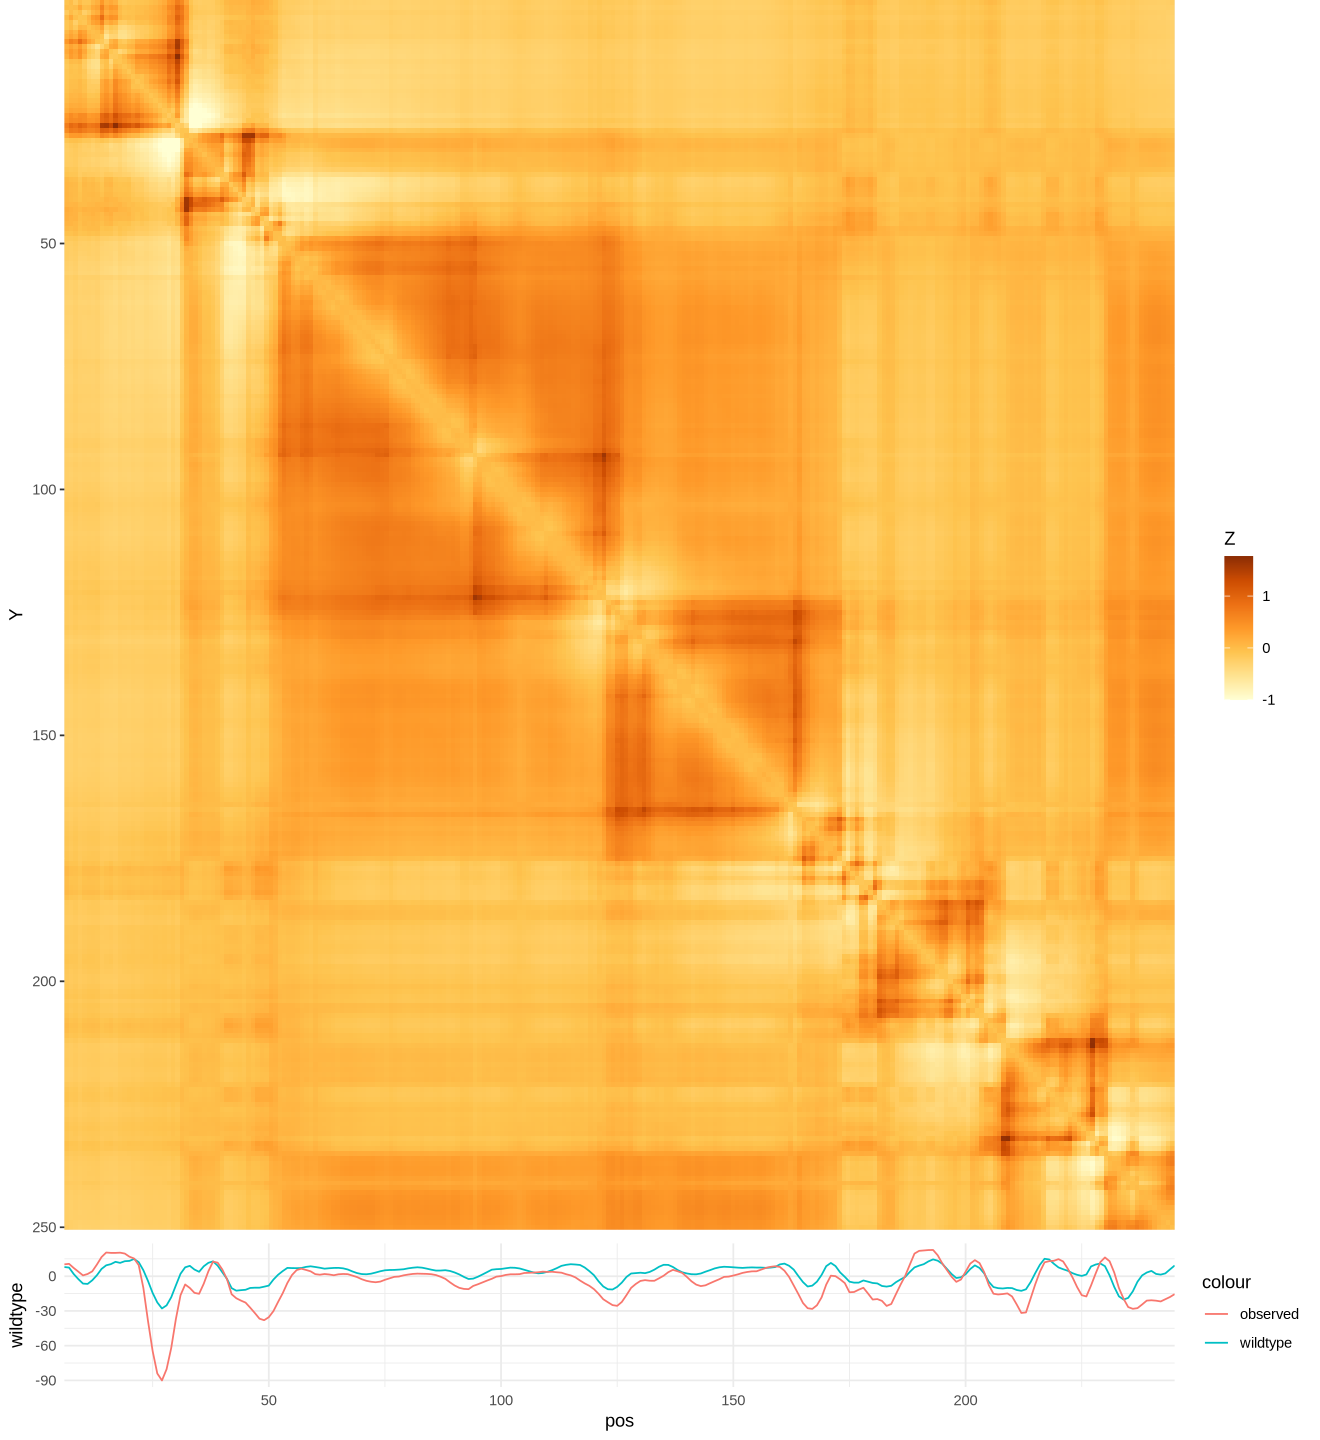

In [146]:
vmin=-1
plotmat = pmat
plotmat[plotmat<vmin] = vmin
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = data %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = wildtype, colour = "wildtype")) +
         geom_line(aes(y = observed, colour = "observed")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

### CTCF mutants

In [147]:
matrix_data = read.table("../bos_taurus/ctcf/shuffle/q0.3/orca_predictions_16Mb.txt", sep = "\t")
hmmat = as.matrix(matrix_data)
colnames(hmmat) <- NULL

In [148]:
mutations = read_tsv("../bos_taurus/ctcf/shuffle/q0.3/ctcf.bed", col_names=c('chrom', 'start', 'end', 'name', 'score', 'strand', 'qvalue', 'mutation'))

Rows: 245 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): name, strand, mutation
dbl (5): chrom, start, end, score, qvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [149]:
head(mutations)

chrom,start,end,name,score,strand,qvalue,mutation
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,168702,168720,MA0139.1.CTCF,17.1967,+,0.1940,shuffle
1,329916,329934,MA0139.1.CTCF,18.9016,-,0.1210,shuffle
1,332574,332592,MA0139.1.CTCF,21.6230,+,0.0422,shuffle
1,477613,477631,MA0139.1.CTCF,16.0164,+,0.2710,shuffle
1,562990,563008,MA0139.1.CTCF,17.5738,+,0.1800,shuffle
1,599571,599589,MA0139.1.CTCF,15.7049,-,0.2930,shuffle


In [150]:
dim(mutations)

[1] 245   8

In [151]:
num = dim(hmmat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(hmmat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
hmutant = tibble(pos = seq_along(scores) + w, hmutant=scores)

In [152]:
data <- wildtype %>%
  left_join(observed, by = "pos") %>%
  left_join(hmutant, by = "pos")

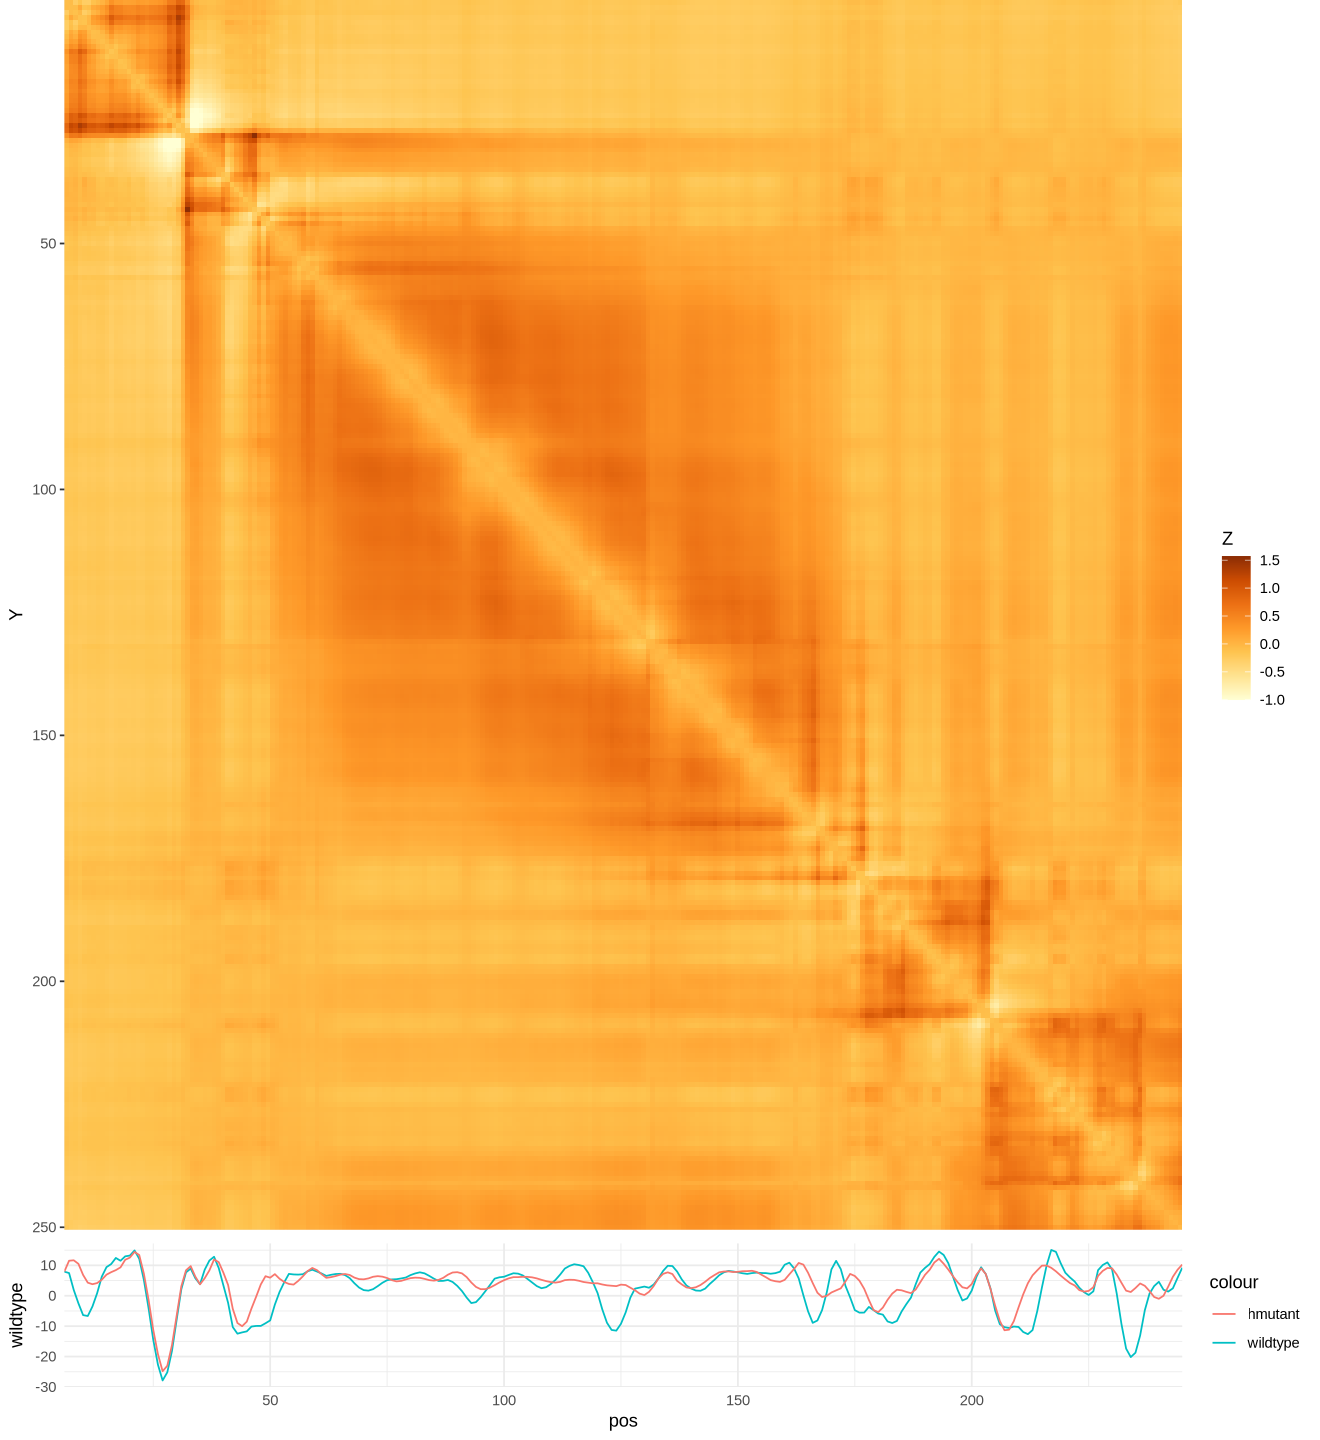

In [153]:
vmin=-1
plotmat = hmmat
plotmat[plotmat<vmin] = vmin
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = data %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = wildtype, colour = "wildtype")) +
         #geom_line(aes(y = observed, colour = "observed")) +
         geom_line(aes(y = hmutant, colour = "hmutant")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

## Ctcf mutant at 16Mb

In [154]:
matrix_data = read.table("../bos_taurus/ctcf/shuffle/15.7mb15.9mb/orca_predictions_16Mb.txt", sep = "\t")
mmat = as.matrix(matrix_data)
colnames(mmat) <- NULL

In [155]:
mutations = read_tsv("../bos_taurus/ctcf/shuffle/15.7mb15.9mb/ctcf.bed", col_names=c('chrom', 'start', 'end', 'name', 'score', 'strand', 'qvalue', 'mutation'))

Rows: 4 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): name, strand, mutation
dbl (5): chrom, start, end, score, qvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [156]:
mutations

chrom,start,end,name,score,strand,qvalue,mutation
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,15706373,15706391,MA0139.1.CTCF,25.9180,-,0.00582,shuffle
1,15770669,15770687,MA0139.1.CTCF,20.8689,+,0.05740,shuffle
1,15877378,15877396,MA0139.1.CTCF,19.5574,-,0.09490,shuffle
1,15881807,15881825,MA0139.1.CTCF,18.1475,-,0.15000,shuffle


In [ ]:
dim(mutations)

[1] 4 8

In [158]:
num = dim(mmat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(mmat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
mutant = tibble(pos = seq_along(scores) + w, mutant=scores)

In [159]:
data <- wildtype %>%
  left_join(mutant, by = "pos") %>%
  left_join(observed, by = "pos") 

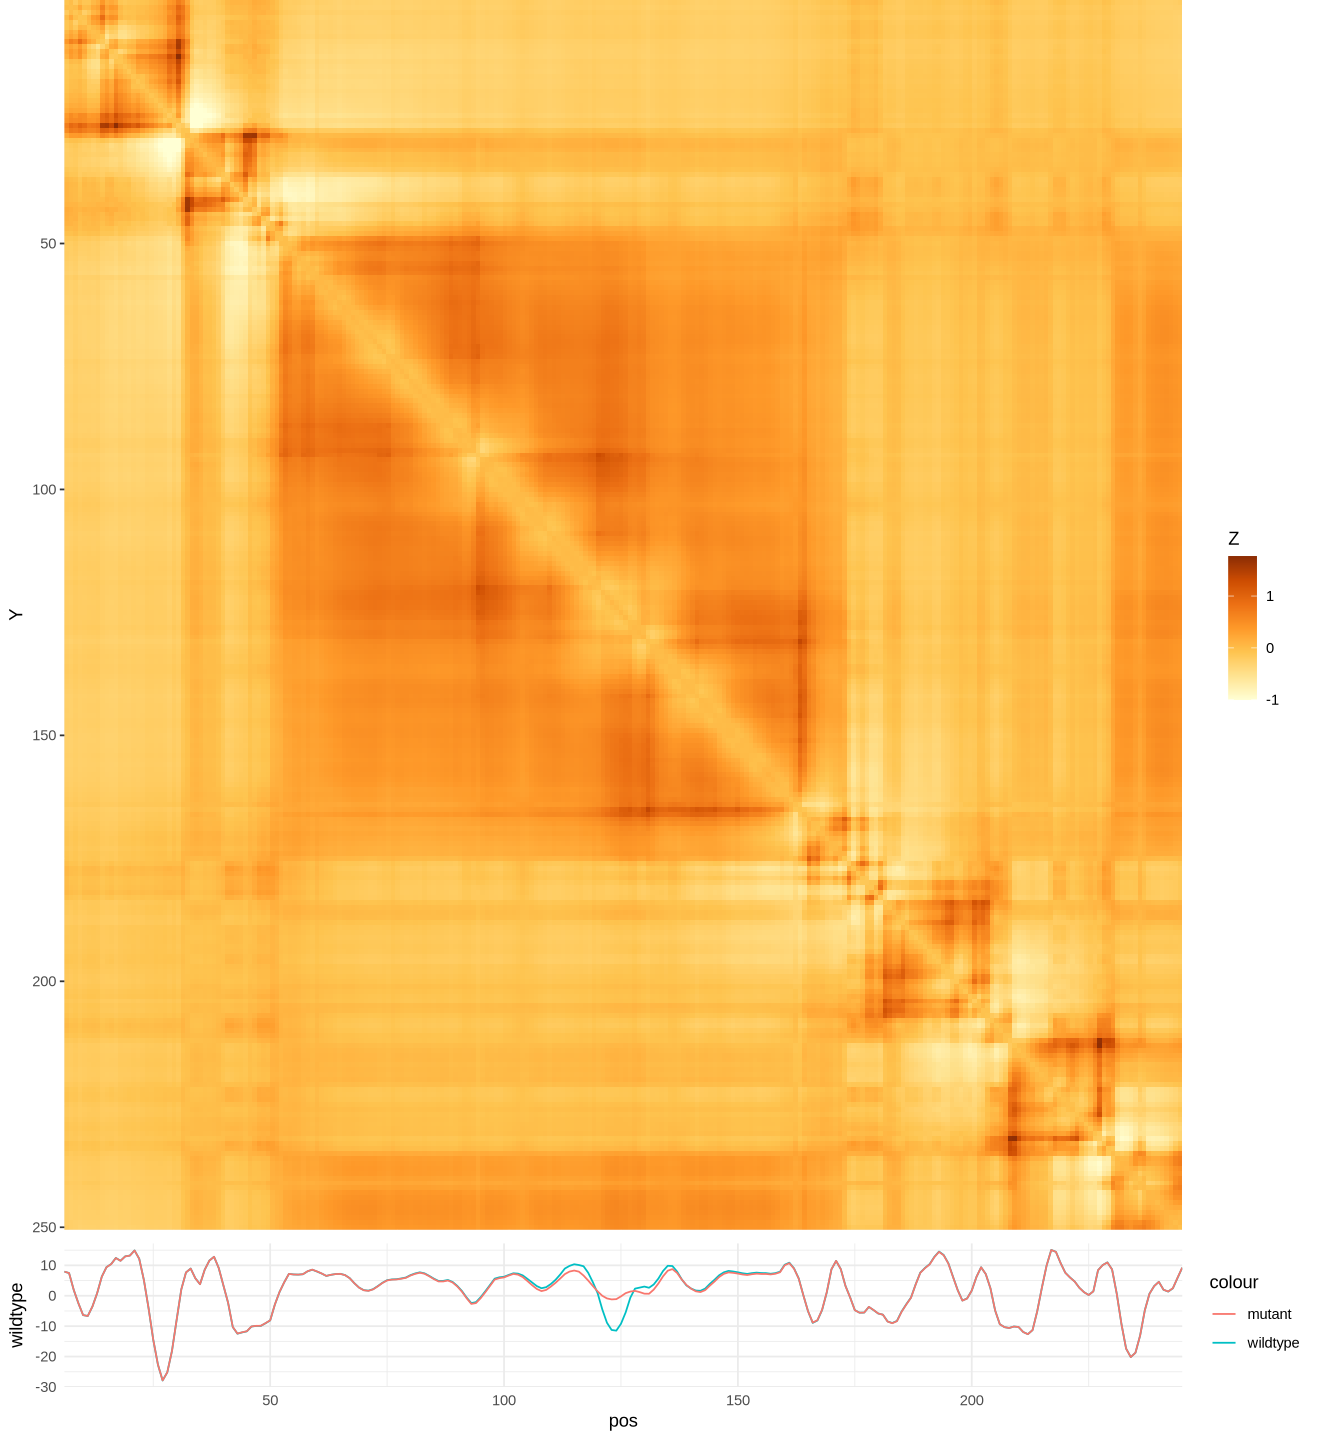

In [160]:
vmin=-1
plotmat = mmat
plotmat[plotmat<vmin] = vmin
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = data %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = wildtype, colour = "wildtype")) +
         #geom_line(aes(y = observed, colour = "observed")) +
         geom_line(aes(y = mutant, colour = "mutant")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

## Inserting CTCF

In [161]:
matrix_data = read.table("../bos_taurus/ctcf/insertion/strong/orca_predictions_16Mb.txt", sep = "\t")
imat = as.matrix(matrix_data)
colnames(imat) <- NULL

In [162]:
mutations = read_tsv("../bos_taurus/ctcf/insertion/strong/ctcf.tsv", col_names=c('chrom', 'start', 'end', 'sequence', 'name', 'strand', 'mutation'))

Rows: 10 Columns: 7
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): sequence, name, strand, mutation
dbl (3): chrom, start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [163]:
mutations

chrom,start,end,sequence,name,strand,mutation
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,17000000,17000019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,-,insertion
1,17005000,17005019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,+,insertion
1,17010000,17010019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,-,insertion
1,17015000,17015019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,+,insertion
1,17020000,17020019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,-,insertion
1,17025000,17025019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,+,insertion
1,17030000,17030019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,-,insertion
1,17035000,17035019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,+,insertion
1,17040000,17040019,TGGCCACCAGGGGGCGCTA,MA0139.1.CTCF,-,insertion


In [164]:
dim(mutations)

[1] 10  7

In [165]:
num = dim(imat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(imat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
ctcfinserted = tibble(pos = seq_along(scores) + w, inserted=scores)

In [166]:
data <- wildtype %>%
  left_join(ctcfinserted, by = "pos")

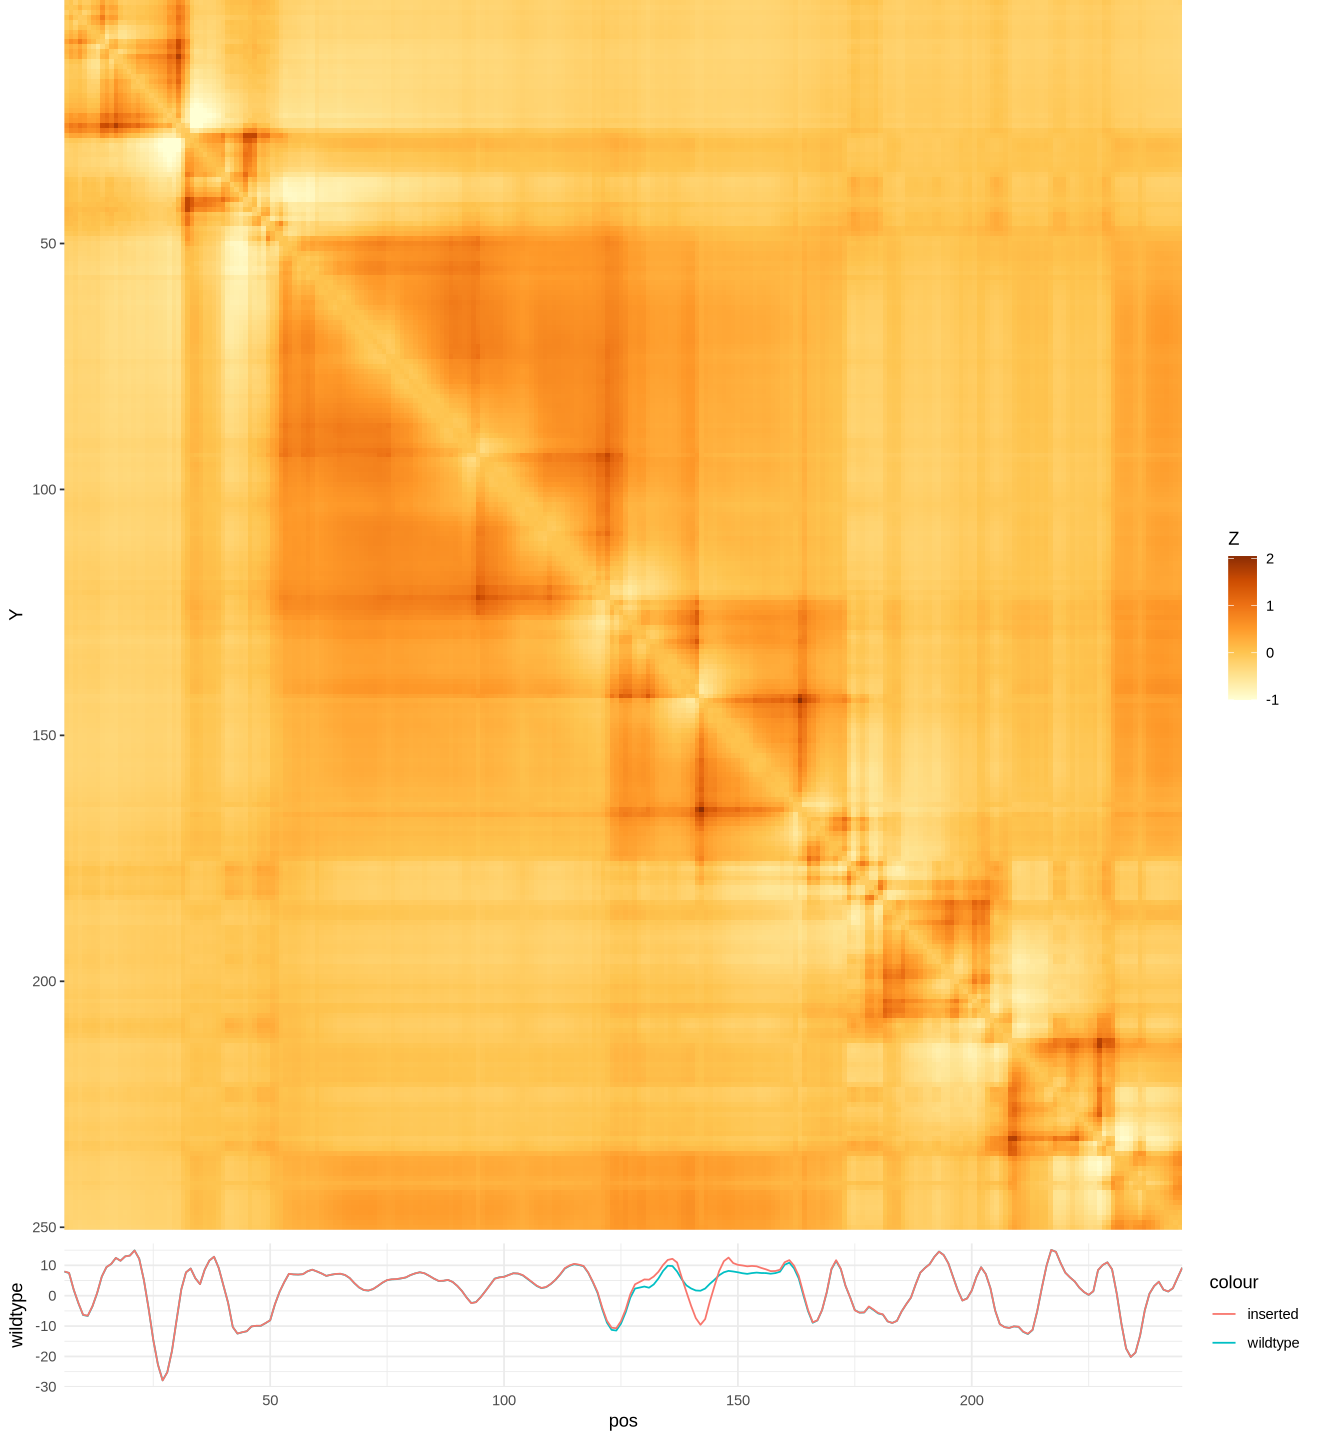

In [167]:
vmin=-1
plotmat = imat
plotmat[plotmat<vmin] = vmin
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = data %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = wildtype, colour = "wildtype")) +
         geom_line(aes(y = inserted, colour = "inserted")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

In [ ]:
func = splinefun(x=wildtype$pos, y=wildtype$wildtype, method="fmm",  ties = mean)
interpolation = tibble(pos = wildtype$pos, interpol=func(wildtype$pos))

### Computing the PC1

In [182]:
cormat = cor(pmat, method = "pearson")
eigen_result <- eigen(cormat)

eigenvalues <- eigen_result$values
eigenvectors <- eigen_result$vectors

PC1 = eigenvectors[,1]
compart = tibble(pos = seq_along(PC1), pc1=PC1)

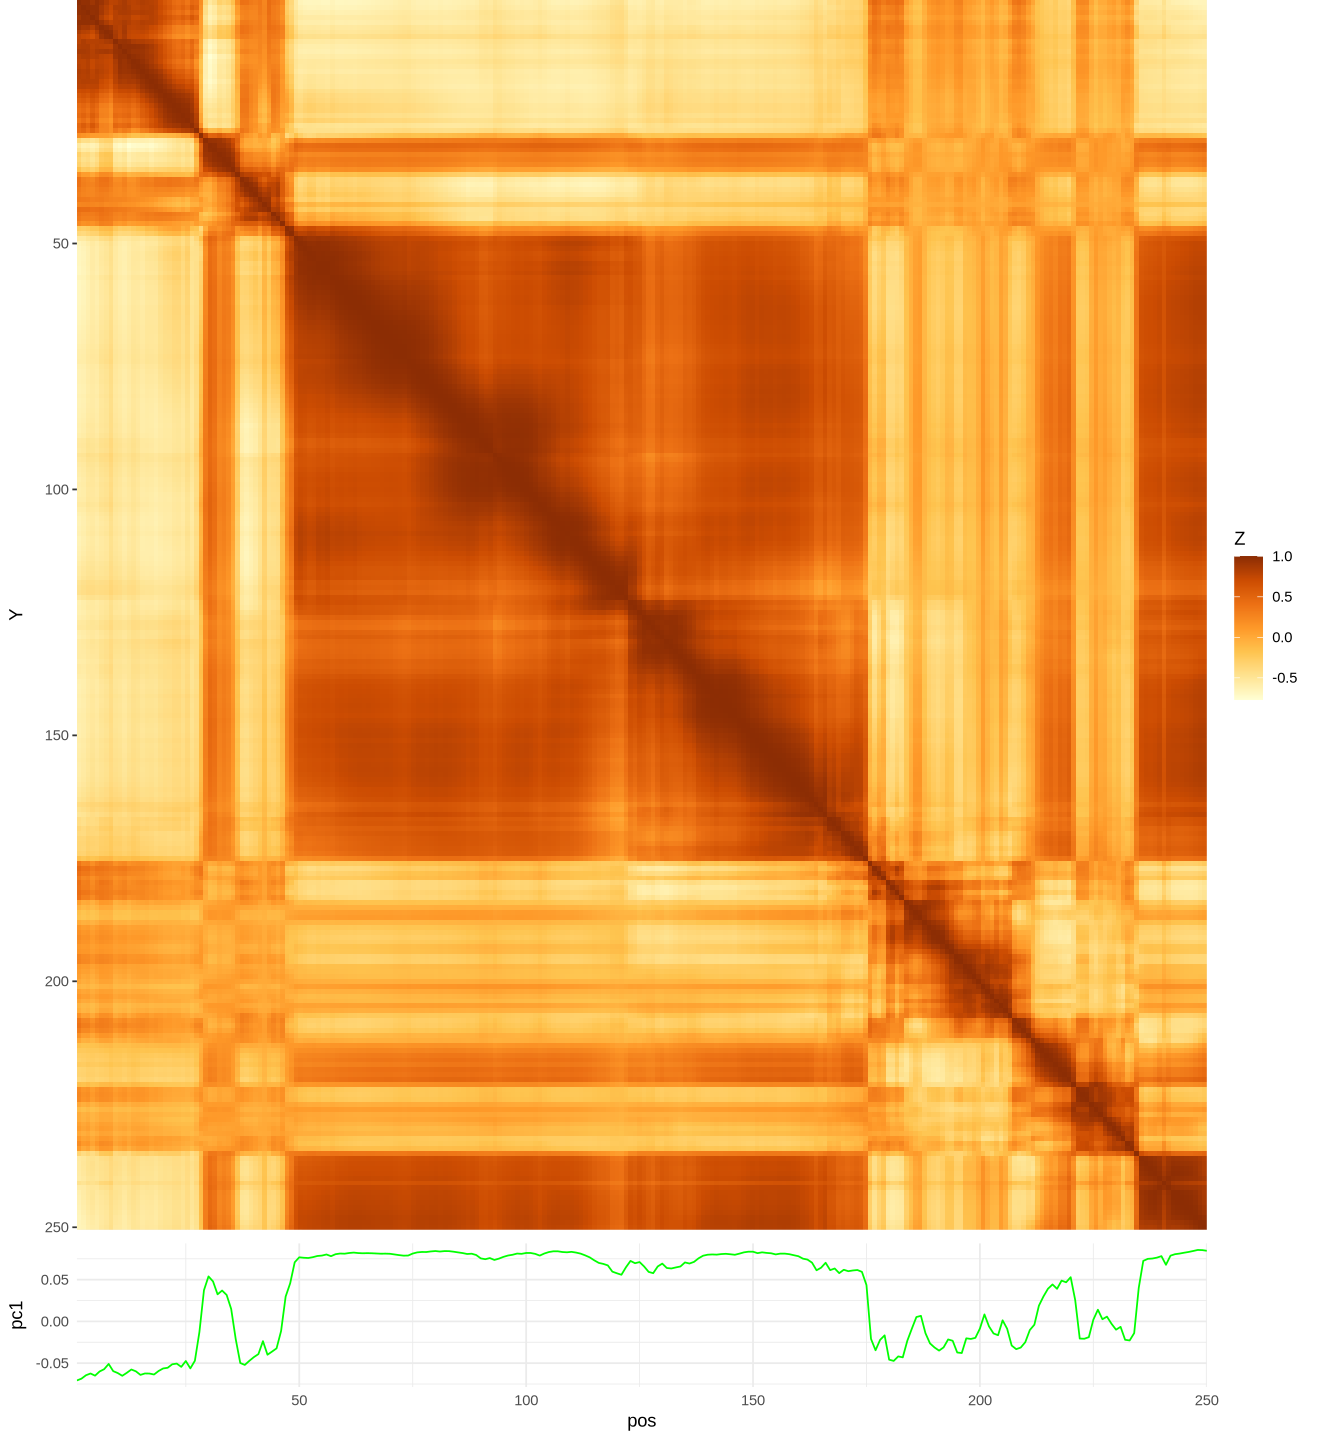

In [175]:
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = cormat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))

p2 = compart %>% ggplot(aes(x=pos, y=pc1)) +
         geom_line(color="green") +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

## Ctcf mutant at 16Mb

In [176]:
matrix_data = read.table("../bos_taurus/ctcf/shuffle/15.7mb15.9mb/orca_predictions_16Mb.txt", sep = "\t")
mmat = as.matrix(matrix_data)
colnames(mmat) <- NULL

In [183]:
cormmat = cor(mmat, method = "pearson")
eigen_result <- eigen(cormmat)

eigenvalues <- eigen_result$values
eigenvectors <- eigen_result$vectors

PC1 = eigenvectors[,1]
mcompart = tibble(pos = seq_along(PC1), mpc1=PC1)

In [184]:
data <- compart %>%
  left_join(mcompart, by = "pos")

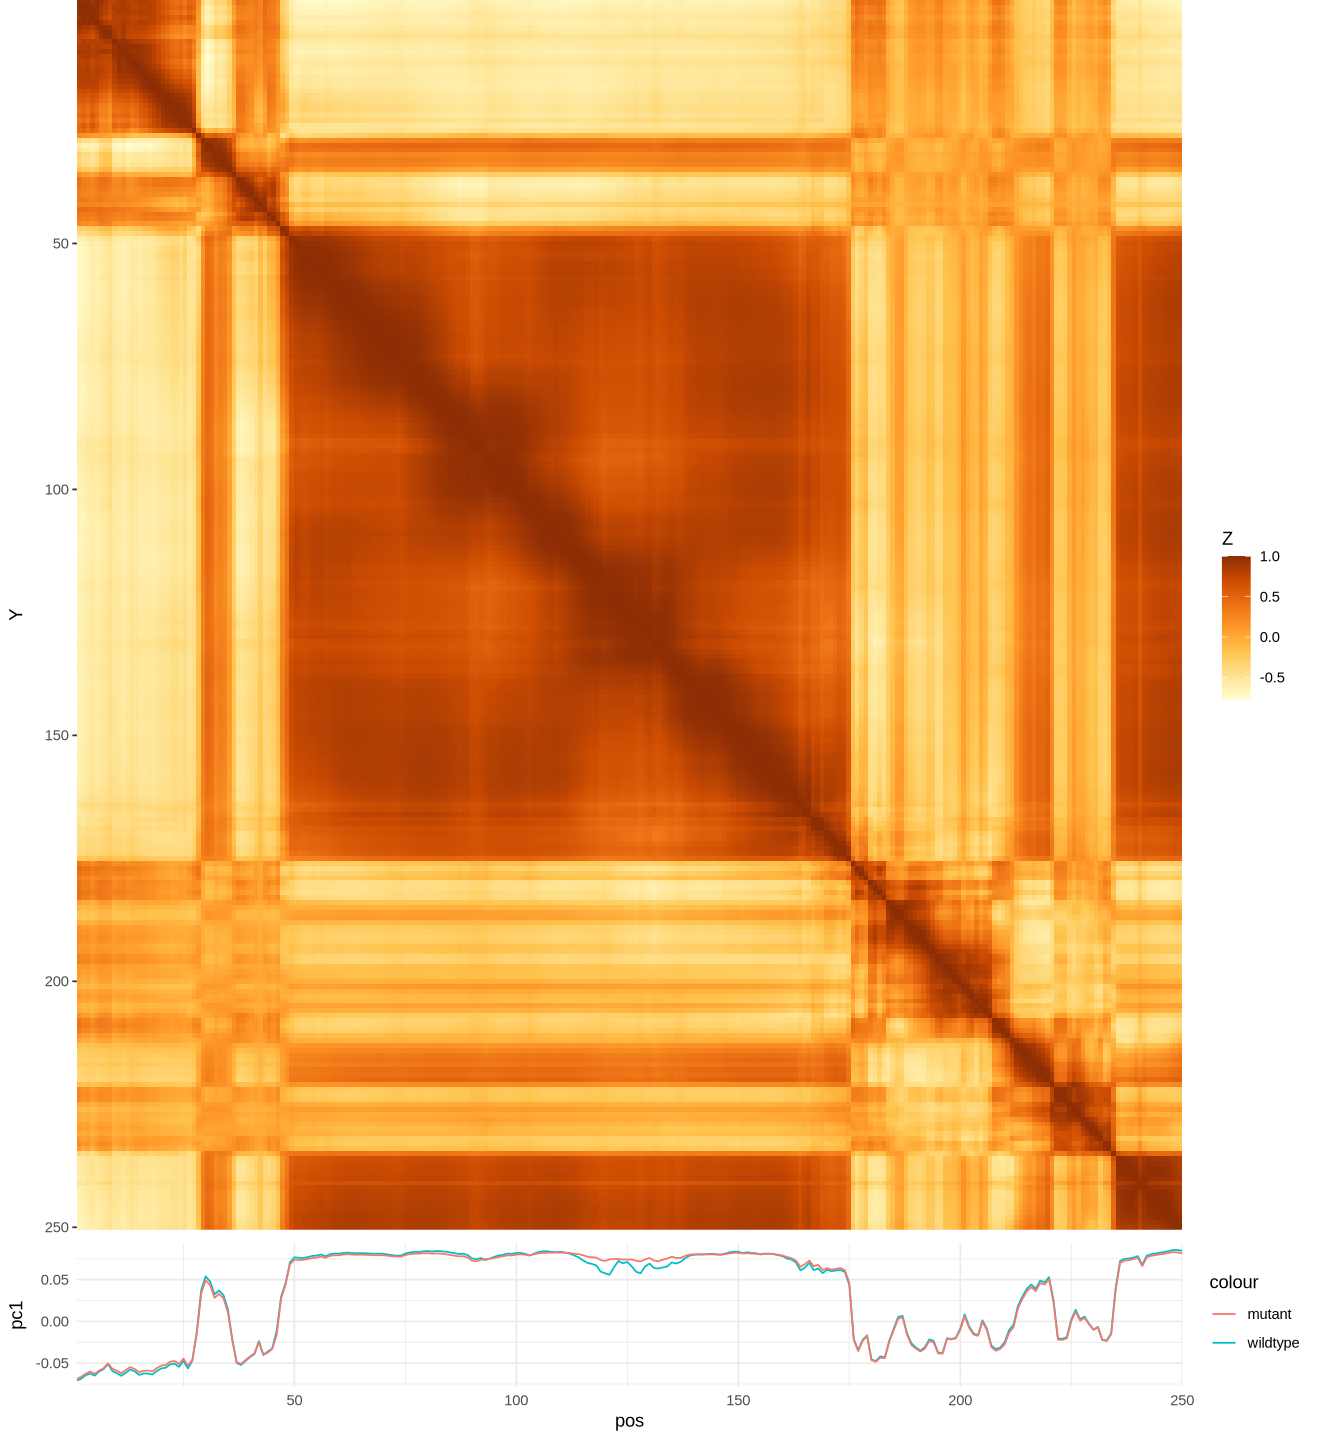

In [185]:
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = cormmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
p2 = data %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = pc1, colour = "wildtype")) +
         geom_line(aes(y = mpc1, colour = "mutant")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()
ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")